# Volatility is (mostly) path-dependent - Guyon, Lekeufack (2022)

This notebook replicates the code for the prediction of the realized volatility from the paper "Volatility is (mostly) path-dependent" by Guyon and Lekeufack (2022). 

In [1]:
from empirical_study.main_function import perform_empirical_study
from empirical_study.utils import *
from empirical_study.plot_functions import *
import yfinance as yf

In [2]:
load_from = pd.to_datetime('1995-01-01')  # Need at least 4 years prior to the first training day
train_start_date = pd.to_datetime('2000-01-01')
test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-05-15')

In [3]:
# Load data on SPX and VIX
spx_data = yf.Ticker("^GSPC").history(start=load_from, end=test_end_date)
vix_data = yf.Ticker("^VIX").history(start=load_from, end=test_end_date)

In [4]:
vix_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-06:00,14.090000,14.710000,13.390000,14.250000,0,0.0,0.0
1995-01-04 00:00:00-06:00,13.870000,14.150000,13.530000,13.530000,0,0.0,0.0
1995-01-05 00:00:00-06:00,13.700000,14.190000,13.370000,13.500000,0,0.0,0.0
1995-01-06 00:00:00-06:00,13.670000,13.760000,12.790000,13.130000,0,0.0,0.0
1995-01-09 00:00:00-06:00,13.530000,14.080000,13.210000,13.330000,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-09 00:00:00-05:00,31.900000,35.480000,31.900000,34.750000,0,0.0,0.0
2022-05-10 00:00:00-05:00,33.660000,34.840000,32.240002,32.990002,0,0.0,0.0
2022-05-11 00:00:00-05:00,32.869999,34.389999,30.690001,32.560001,0,0.0,0.0


In [5]:
spx_data.index = pd.to_datetime(spx_data.index.date)
vix_data.index = pd.to_datetime(vix_data.index.date)

In [6]:
spx = spx_data['Close']
vix = vix_data['Close']/100

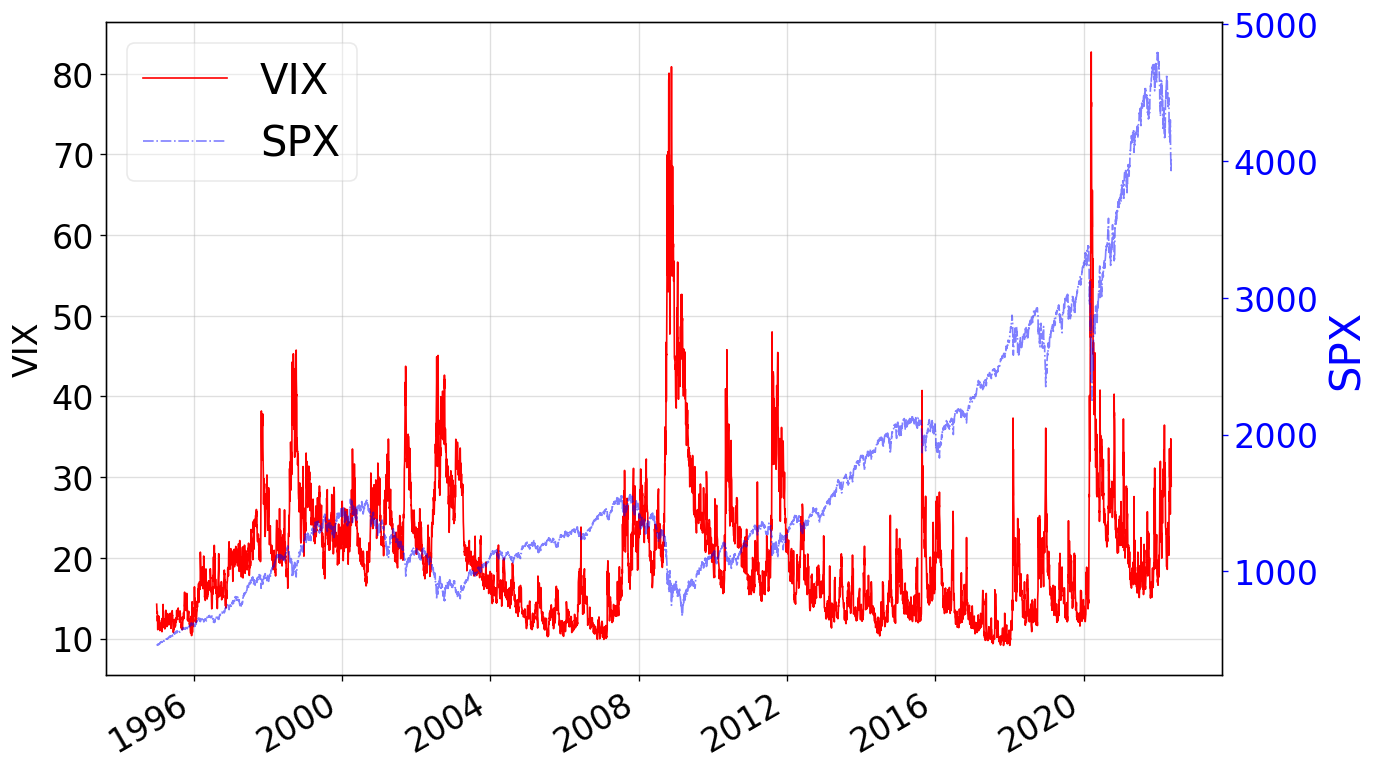

In [7]:
# Plot data
fig = plot_timeseries(100*vix, label='VIX', secondary=spx, secondary_label='SPX', 
                      add_hline=False, color_secondary='b', display_score=False)

In [8]:
max_delta = 1000  # Number of past returns used in the computation of R_{n,t} in business days
test_start = test_start_date
test_end = test_end_date
train_start = train_start_date
tspl = True # if True, use time-shifted power-law kernels. Otherwise, use a convex combination of two exponentials

In [9]:
# Next cell runs in about 1-3 minutes if tspl=True, and up to 10 minutes if tspl=False.
p = 1
setting = [(1, 1), (2, 1/2)] # Our linear model
# setting = [(1, (1,2)), (2, 1/2)] # Our model with a parabolic term in R_1
sol = perform_empirical_study(vol=vix, index=spx, p=p, tspl=tspl, setting=setting, train_start_date=train_start,
                                  test_start_date=test_start, test_end_date=test_end, 
                                  max_delta=max_delta)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices